<a href="https://colab.research.google.com/github/Billysanchez/Primer-repositorio/blob/main/METODO_TESIS_FINAL_FINAL_HRP_2009_2019_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyPortfolioOpt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 798.1 kB/s eta 0:00:00


In [ ]:
# Hierarchical Risk Parity
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch,random
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt import objective_functions
from pypfopt import HRPOpt
import yfinance as yf
import warnings


In [ ]:
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4f}'.format

# Date range
start = '2013-01-01'
end = '2023-12-30'

# Tickers of Chilean assets in IPSA
lab1 = ['BSAC', 'BCH', 'CENCOSUD.SN', 'CMPC.SN', 'COPEC.SN',
          'ENELCHILE.SN', 'ENELAM.SN', 'FALABELLA.SN','BCI.SN',
          'PARAUCO.SN', 'RIPLEY.SN', 'CCU.SN', 'SECURITY.SN', 'SMU.SN',
          'SONDA.SN', 'SQM-B.SN', 'ENTEL.SN', 'VAPORES.SN', 'CAP.SN',
          'COLBUN.SN', 'ANDINA-B.SN', 'ECL.SN', 'IAM.SN',
          'CONCHATORO.SN', 'EMBONOR-B.SN', 'AGUAS-A.SN']
# Downloading data
data = yf.download(lab1, start=start, end=end)

# Calcular los retornos diarios
ret = data['Adj Close'].pct_change().dropna()
returns = ret.iloc[:, 1:]

# Define the prices as in your original code
prices = data['Adj Close']

# Displaying the first few rows of returns and price
print("Daily Returns:")
print(returns.head())
print("\nPrices:")
print(prices.head())


[*********************100%%**********************]  26 of 26 completed


Daily Returns:
Ticker      ANDINA-B.SN     BCH  BCI.SN    BSAC  CAP.SN  CCU.SN  CENCOSUD.SN  \
Date                                                                           
2017-01-25      -0.0106  0.0189  0.0017  0.0138 -0.0161  0.0000       0.0263   
2017-01-26      -0.0010 -0.0021  0.0040  0.0068  0.0007  0.0079      -0.0012   
2017-01-27      -0.0141 -0.0040 -0.0027 -0.0023  0.0228 -0.0034      -0.0092   
2017-01-30      -0.0355 -0.0047 -0.0316 -0.0235  0.0139 -0.0080      -0.0045   
2017-01-31      -0.0135 -0.0085 -0.0078 -0.0023  0.0098  0.0114      -0.0084   

Ticker      CMPC.SN  COLBUN.SN  CONCHATORO.SN  ...  ENTEL.SN  FALABELLA.SN  \
Date                                           ...                           
2017-01-25   0.0024     0.0146        -0.0223  ...    0.0143        0.0099   
2017-01-26  -0.0159     0.0046        -0.0111  ...   -0.0011        0.0087   
2017-01-27   0.0183    -0.0212        -0.0092  ...   -0.0124       -0.0059   
2017-01-30  -0.0289    -0.0150    

In [ ]:
# Suponiendo que 'data' es tu DataFrame con los datos de Yahoo Finance

# Definir las etiquetas de columna
lab1 = ['BSAC', 'BCH', 'CENCOSUD.SN', 'CMPC.SN', 'COPEC.SN',
          'ENELCHILE.SN', 'ENELAM.SN', 'FALABELLA.SN','BCI.SN',
          'PARAUCO.SN', 'RIPLEY.SN', 'CCU.SN', 'SECURITY.SN', 'SMU.SN',
          'SONDA.SN', 'SQM-B.SN', 'ENTEL.SN', 'VAPORES.SN', 'CAP.SN',
          'COLBUN.SN', 'ANDINA-B.SN', 'ECL.SN', 'AGUAS-A.SN',
          'CONCHATORO.SN', 'EMBONOR-B.SN', 'IAM.SN']

# Calcular los retornos diarios
ret = data['Adj Close'].pct_change().dropna()
returns = ret.iloc[:, 1:]

# Mostrar los primeros valores de los retornos y las etiquetas de columna
print("Daily Returns:")
print(returns.head())
print("\nColumn Labels:")
print(lab1)


Daily Returns:
Ticker      ANDINA-B.SN     BCH  BCI.SN    BSAC  CAP.SN  CCU.SN  CENCOSUD.SN  \
Date                                                                           
2017-01-25      -0.0106  0.0189  0.0017  0.0138 -0.0161  0.0000       0.0263   
2017-01-26      -0.0010 -0.0021  0.0040  0.0068  0.0007  0.0079      -0.0012   
2017-01-27      -0.0141 -0.0040 -0.0027 -0.0023  0.0228 -0.0034      -0.0092   
2017-01-30      -0.0355 -0.0047 -0.0316 -0.0235  0.0139 -0.0080      -0.0045   
2017-01-31      -0.0135 -0.0085 -0.0078 -0.0023  0.0098  0.0114      -0.0084   

Ticker      CMPC.SN  COLBUN.SN  CONCHATORO.SN  ...  ENTEL.SN  FALABELLA.SN  \
Date                                           ...                           
2017-01-25   0.0024     0.0146        -0.0223  ...    0.0143        0.0099   
2017-01-26  -0.0159     0.0046        -0.0111  ...   -0.0011        0.0087   
2017-01-27   0.0183    -0.0212        -0.0092  ...   -0.0124       -0.0059   
2017-01-30  -0.0289    -0.0150    

In [ ]:
# Compute covariance of returns
cov=returns.cov()

In [ ]:
# TREE CLUSTERING
# Computation of the correlation matrix
corr=returns.corr()

Text(0.5, 1.0, 'Correlations of daily returns in period 2013-2023')

<Figure size 640x480 with 0 Axes>

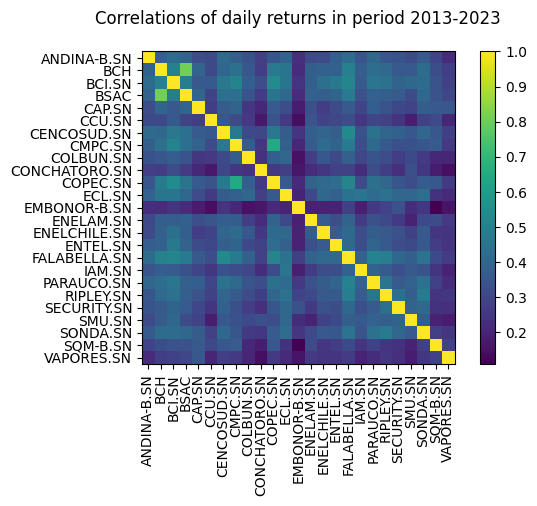

In [ ]:
# Plot correlation matrix
plt.figure()
plotting.plot_covariance(corr)
plt.title('Correlations of daily returns in period 2013-2023',pad=20)

In [ ]:
# Computation of the distance matrix
def correlDist(corr):
 # A distance matrix based on correlation, where 0<=d[i,j]<=1
 # This is a proper distance metric
 dist=((1-corr)/2.)**.5 # distance matrix
 return dist
d_corr=correlDist(corr)

In [ ]:
# Computation of the linkage matrix using the Euclidean distance measure and the single linkage method
link_corr=sch.linkage(d_corr,'ward','euclidean')

In [ ]:
# Imprimir las dimensiones de link_corr y lab1
print("Dimensiones de link_corr:", link_corr.shape)
print("Longitud de lab1:", len(lab1))

# Imprimir los primeros elementos de link_corr y lab1
print("Primeros elementos de link_corr:")
print(link_corr[:5])  # Imprime solo los primeros 5 elementos
print("Primeros elementos de lab1:")
print(lab1[:5])  # Imprime solo los primeros 5 elementos



Dimensiones de link_corr: (24, 4)
Longitud de lab1: 26
Primeros elementos de link_corr:
[[ 1.          3.          0.43881614  2.        ]
 [ 7.         10.          0.58964283  2.        ]
 [ 6.         16.          0.68896198  2.        ]
 [19.         22.          0.72916798  2.        ]
 [ 2.         27.          0.73108164  3.        ]]
Primeros elementos de lab1:
['BSAC', 'BCH', 'CENCOSUD.SN', 'CMPC.SN', 'COPEC.SN']


In [ ]:
import numpy as np

# Determina el número de nodos en el dendrograma
num_nodos = link_corr.shape[0] + 1  # Número de filas en link_corr + 1

# Ajusta lab1 para que tenga el mismo número de elementos que el número de nodos en el dendrograma
if len(lab1) > num_nodos:
    lab1 = lab1[:num_nodos]
elif len(lab1) < num_nodos:
    # Si lab1 es más corto, agrega etiquetas adicionales para completar el número de nodos
    lab1.extend([f"Node_{i}" for i in range(len(lab1), num_nodos)])

# Asegúrate de que lab1 esté ordenado de la misma manera que los nodos en el dendrograma
lab1_ordenado = [lab1[int(i)] for i in np.argsort(link_corr[:, 2])]

# Verifica la longitud de lab1 y los primeros elementos de lab1 para asegurarte de que coincidan con el número de nodos
print("Longitud de lab1 ajustada:", len(lab1_ordenado))
print("Primeros elementos de lab1 ajustado:", lab1_ordenado[:5])


Longitud de lab1 ajustada: 24
Primeros elementos de lab1 ajustado: ['BSAC', 'BCH', 'CENCOSUD.SN', 'CMPC.SN', 'COPEC.SN']


Text(0.5, 1.0, 'Clusters derived from the tree clustering')

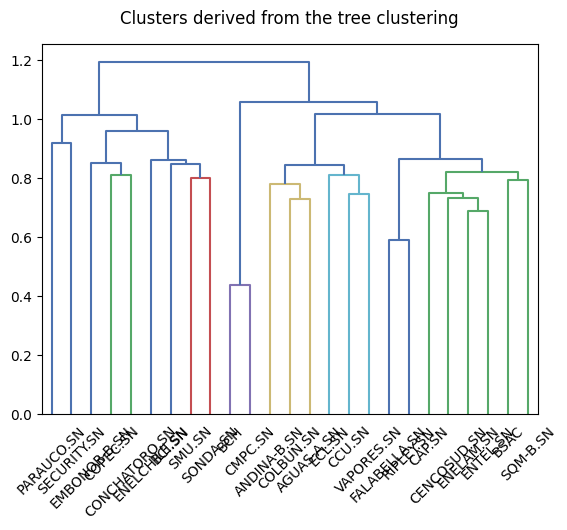

In [ ]:
# Plot the dendrogram
d=dendrogram(link_corr,labels=lab1,leaf_rotation=45)
plt.title('Clusters derived from the tree clustering', pad=15)


In [ ]:
import pandas as pd

def getQuasiDiag(link):
    # Convertir a enteros
    link = link.astype(int)
    # Inicializar sortIx con los elementos de la última fila de la matriz de enlace
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    # Número de elementos originales
    numItems = link[-1, 3]

    # Mientras el índice máximo sea mayor o igual al número de elementos originales
    while sortIx.max() >= numItems:
        # Hacer espacio para insertar clusters
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)
        # Encontrar clusters
        df0 = sortIx[sortIx >= numItems]
        # Índices de los clusters
        i = df0.index
        # Valores de los clusters
        j = df0.values - numItems
        # Actualizar sortIx con los elementos del cluster
        sortIx[i] = link[j, 0]  # item 1
        # Crear una serie con los elementos del cluster
        df0 = pd.Series(link[j, 1], index=i + 1)
        # Concatenar la serie al sortIx
        sortIx = pd.concat([sortIx, df0])  # item 2
        # Reordenar sortIx
        sortIx = sortIx.sort_index()
        # Reindexar sortIx
        sortIx.index = range(sortIx.shape[0])

    # Convertir sortIx a lista y devolverla
    return sortIx.tolist()

# Ejemplo de uso
sortIx = getQuasiDiag(link_corr)



In [ ]:
#Ordered matrix
sortIx=getQuasiDiag(link_corr)
sortIx=corr.index[sortIx].tolist() # recover labels
sort_corr=corr.loc[sortIx,sortIx] # reorder


Text(0.5, 1.0, 'Ordered Correlations of daily returns in period 2013-2023')

<Figure size 640x480 with 0 Axes>

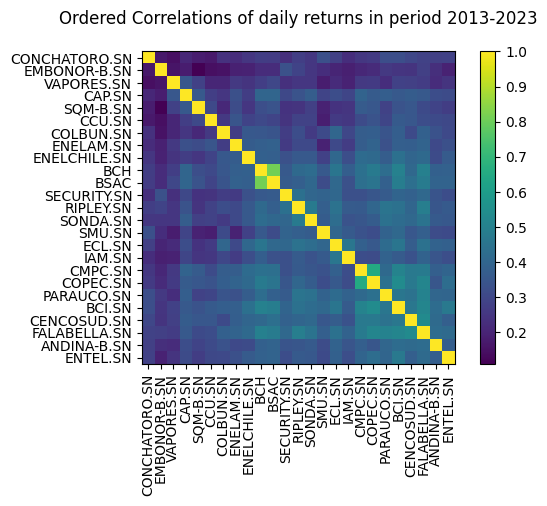

In [ ]:
#Plot the ordered matrix
plt.figure()
plotting.plot_covariance(sort_corr)
plt.title('Ordered Correlations of daily returns in period 2013-2023',pad=20)

In [ ]:
#Compute the condition number of the clustered covariance matrix
print (np.linalg.cond(sort_corr, p=None))

51.47632716970057


In [ ]:
#RECURSIVE BISECTION
# Define cluster variance
def getIVP(cov,**kargs):
 # Compute the inverse-variance portfolio
 ivp=1./np.diag(cov)
 ivp/=ivp.sum()
 return ivp
def getClusterVar(cov,cItems):
 # Compute variance per cluster
 cov_=cov.loc[cItems,cItems] # matrix slice
 w_=getIVP(cov_).reshape(-1,1)
 cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
 return cVar

In [ ]:
def getRecBipart(cov, sortIx):
    # Compute HRP allocation
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster

    while len(cItems) > 0:
        cItems = [i[int(j):int(k)] for i in cItems for j, k in ((0, len(i) / 2),
                                                               (len(i) / 2, len(i))) if len(i) > 1]  # bi-section

        for y in range(0, len(cItems), 2):  # parse in pairs
            cItems0 = cItems[y]  # cluster 1
            cItems1 = cItems[y + 1]  # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  # weight 1
            w[cItems1] *= 1 - alpha  # weight 2

    return w


In [ ]:
#Compute weights
hrp=getRecBipart(cov,sortIx)
print(hrp)

CONCHATORO.SN   0.0933
EMBONOR-B.SN    0.1045
VAPORES.SN      0.0362
CAP.SN          0.0315
SQM-B.SN        0.0262
CCU.SN          0.0613
COLBUN.SN       0.0400
ENELAM.SN       0.0494
ENELCHILE.SN    0.0409
BCH             0.0437
BSAC            0.0286
SECURITY.SN     0.0395
RIPLEY.SN       0.0337
SONDA.SN        0.0316
SMU.SN          0.0335
ECL.SN          0.0381
IAM.SN          0.0343
CMPC.SN         0.0289
COPEC.SN        0.0389
PARAUCO.SN      0.0234
BCI.SN          0.0320
CENCOSUD.SN     0.0248
FALABELLA.SN    0.0240
ANDINA-B.SN     0.0365
ENTEL.SN        0.0250
dtype: float64


<Axes: >

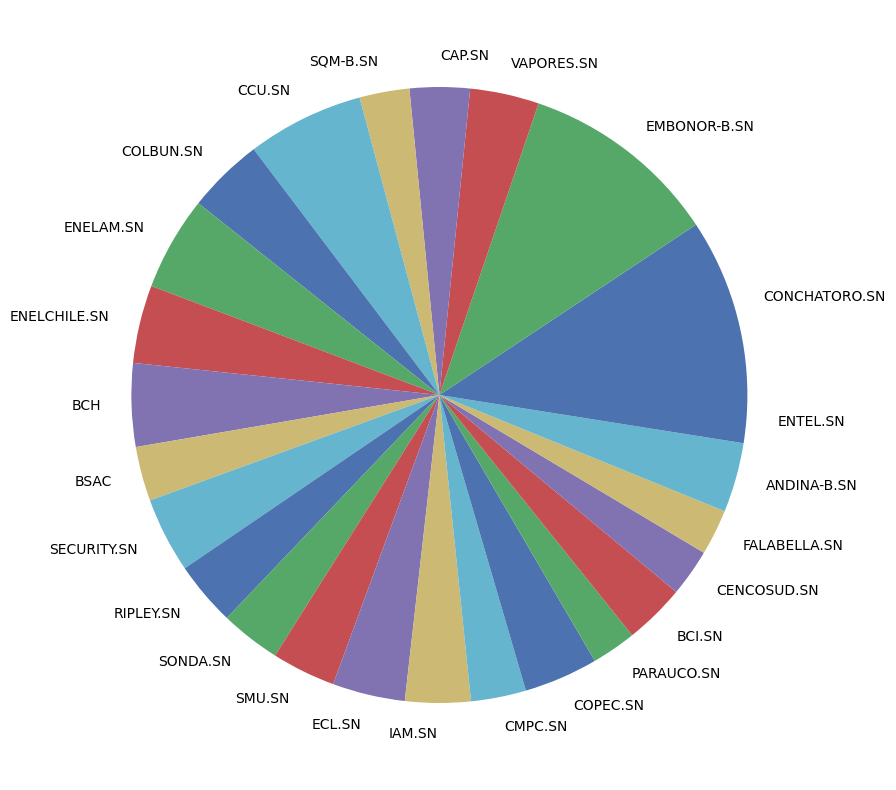

In [ ]:
#Plot weights
pd.Series(hrp).plot.pie(figsize=(10, 10))

In [ ]:
#Performance expected volatility
def get_vol(self, data, weights):
 # normal volatility calculation
 cov = data.cov().values
 weights = weights.values
 var = np.dot(weights.T.dot(cov), weights)
 return np.sqrt(var * 252)
v=get_vol('self',returns, hrp)
print (v)

0.19294721579856455


In [ ]:
#Performance expected return
mu = ret.mean()
mu=((mu.add(1).pow(252)).sub(1))
r=np.dot((np.array(mu[1:])),np.array(hrp))
print (r)

0.07929911938693028


In [ ]:
sharpe_ratio = (r - 0) / v
print(sharpe_ratio)


0.41098866888920527


COMPARACION CON LA REALIDAD
